# De-N nonlinearity experiment

## build the MODFLOW and MT3DUSGS models

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import flopy
import pyemu
model_ws = "den_exp"

In [82]:
m = flopy.modflow.Modflow("den",model_ws=model_ws,version="mfnwt",exe_name="mfnwt")
d = flopy.modflow.ModflowDis(m,nrow=1,nlay=2,ncol=100,nper=1,delr=1000,delc=1000,top=10,botm=[0,-100],perlen=365.25*20,steady=True)
d = flopy.modflow.ModflowBas(m,strt=10)
d = flopy.modflow.ModflowLpf(m,laytyp=1,hk=10.0,vka=1.0)
d = flopy.modflow.ModflowPcg(m)
d = flopy.modflow.ModflowOc(m)#,chedfm="({0}E15.6)".format(m.ncol))
d = flopy.modflow.ModflowLmt(m,output_file_format="formatted")
ghb_data = [[0,0,0,0.0,100.0],[0,0,m.ncol-1,9.0,100.0]]
ghb = flopy.modflow.ModflowGhb(m,stress_period_data={0:ghb_data})
m.write_input()
m.run_model()

FloPy is using the following  executable to run the model: /Users/jeremyw/bin/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.3, 8/01/2017                        
                    BASED ON MODFLOW-2005 Version 1.11.0 08/08/2013                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: den.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/09/24  8:17:56

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/09/24  8:17:56
 Elapsed run time:  0.009 Seconds

  Normal termination of simulation


(True, [])

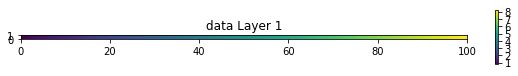

In [83]:
hds = flopy.utils.HeadFile(os.path.join(m.model_ws,m.name+".hds"))
fig = plt.figure(figsize=(10,2))
hds.plot(colorbar=True,mflay=0)

In [84]:
mt = flopy.mt3d.Mt3dms("den_mt3d",model_ws=model_ws,modflowmodel=m,exe_name="mt3dusgs")
nper = 20
perlen = np.zeros((nper)) + 365.25
d = flopy.mt3d.Mt3dBtn(mt,nper=nper,sconc=0.5/1000.0,prsity=0.1,perlen=perlen,nstp=1,tsmult=1.0)
d = flopy.mt3d.Mt3dGcg(mt)
d = flopy.mt3d.Mt3dAdv(mt,mixelm=0)
d = flopy.mt3d.Mt3dDsp(mt,al=0.01,trpt=0.1)
d = flopy.mt3d.Mt3dRct(mt,isothm=0,ireact=1,igetsc=0,rc1=0.001)
id = flopy.mt3d.Mt3dSsm.itype_dict()
ssm_data_load = [[0,0,m.ncol-1,10.0,15],[0,0,0,0.0,id["GHB"]],[0,0,m.ncol-1,0.0,id["GHB"]]]
ssm_data_off = ssm_data_load.copy()
ssm_data_off[0][-2] = 0.0
d = flopy.mt3d.Mt3dSsm(mt,stress_period_data={0:ssm_data_load,10:ssm_data_off},mxss=3)
mt.write_input()
mt.run_model()

Specified value of ftlfree conflicts with FTL file format
Switching ftlfree from False to True
FloPy is using the following  executable to run the model: /Users/jeremyw/bin/mt3dusgs

 MT3D-USGS - Modular 3D Multi-Species Transport Model [Ver 1.00.00] 
 and based on MT3DMS. MT3D-USGS developed in cooperation by 
 S.S. Papadopulos & Associates and the U.S. Geological Survey

 Using NAME File: den_mt3d.nam

 STRESS PERIOD NO.    1

 TIME STEP NO.    1
 FROM TIME =   0.0000     TO    365.20    

 Transport Step:    1   Step Size:   365.2     Total Elapsed Time:   365.20    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2857      [K,I,J]    1    1  100
 Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.5960E-07  [K,I,J]    1    1   40

 STRESS PERIOD NO.    2

 TIME STEP NO.    1
 FROM TIME =   365.20     TO    730.40    

 Transport Step:    1   Step Size:   365.2     Total Elapsed Time:   730.40    
 Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.2786      [K,I,J]    1    1  100
 Outer Iter. 

(False, [])